In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from imblearn.over_sampling import SMOTE

from sklearn.impute import SimpleImputer

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.facecolor'] = 'white'
#pd.set_option('display.max_rows', None)

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,Engine CC,airbags,cylinder,ncap_rating,Seats
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,4.750751,5.481481,40.498498,19543.088088,1.747748,1640.302302,3.116116,3.626627,1.758759,5.281281
std,3.890914,2.704818,13.229504,18156.818302,1.122922,601.358723,1.829542,0.483942,1.378645,0.836277
min,0.000000,0.000000,2.000000,290.000000,1.000000,624.000000,1.000000,3.000000,0.000000,2.000000
25%,2.000000,4.000000,31.000000,6112.000000,1.000000,1198.000000,2.000000,3.000000,0.000000,5.000000
50%,5.000000,5.000000,39.000000,8794.000000,1.000000,1497.000000,2.000000,4.000000,2.000000,5.000000
75%,6.000000,7.000000,49.000000,27003.000000,3.000000,1995.000000,6.000000,4.000000,3.000000,5.000000
max,88.000000,16.000000,87.000000,73430.000000,5.000000,5461.000000,6.000000,4.000000,5.000000,10.000000


In [4]:
train.isnull().sum()

policy_id              0
policy_tenure          0
age_of_car             0
age_of_policyholder    0
area_cluster           0
population_density     0
make                   0
segment                0
model                  0
fuel_type              0
Engine CC              0
airbags                0
cylinder               0
transmission_type      0
steering_type          0
is_central_locking     0
is_speed_alert         0
ncap_rating            0
Name                   0
Owner_Type             0
Seats                  0
price                  0
dtype: int64

In [5]:
train.duplicated().sum()

0

In [6]:
train.nunique()

policy_id              999
policy_tenure           16
age_of_car              17
age_of_policyholder     66
area_cluster            22
population_density      22
make                     5
segment                  6
model                   11
fuel_type                3
Engine CC              101
airbags                  3
cylinder                 2
transmission_type        2
steering_type            3
is_central_locking       2
is_speed_alert           2
ncap_rating              5
Name                   679
Owner_Type               4
Seats                    7
price                  774
dtype: int64

In [7]:
print('Shape of train dataset is',train.shape)

Shape of train dataset is (999, 22)


In [8]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,Engine CC,airbags,cylinder,transmission_type,steering_type,is_central_locking,is_speed_alert,ncap_rating,Name,Owner_Type,Seats,price
0,ID00001,5,4,54,C1,4990,1,A,M1,CNG,998,2,3,Manual,Power,No,Yes,0,Maruti Wagon R LXI CNG,First,5,13495
1,ID00002,4,6,54,C2,27003,1,A,M1,CNG,1582,2,3,Manual,Power,No,Yes,0,Hyundai Creta 1.6 CRDi SX Option,First,5,16500
2,ID00003,5,14,45,C3,4076,1,A,M1,CNG,1199,2,3,Manual,Power,No,Yes,0,Honda Jazz V,First,5,16500
3,ID00004,4,5,45,C4,21622,1,C1,M2,Petrol,1248,2,4,Automatic,Electric,Yes,Yes,2,Maruti Ertiga VDI,First,7,13950
4,ID00005,2,6,65,C5,34738,2,A,M3,Petrol,1968,2,3,Automatic,Electric,Yes,Yes,2,Audi A4 New 2.0 TDI Multitronic,Second,5,17450


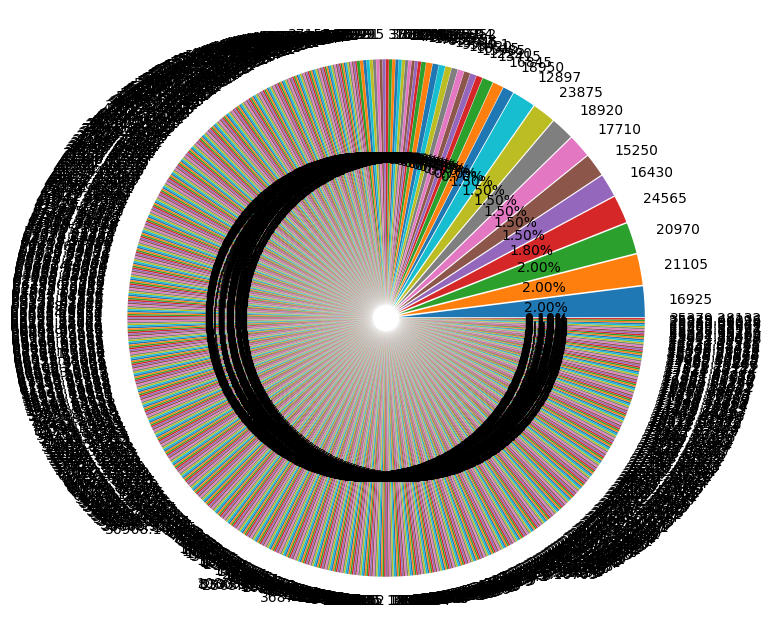

In [9]:

price_counts = train['price'].value_counts()
explode = [0.05] * len(price_counts)
plt.figure(figsize=(8, 8))
plt.pie(price_counts, labels=price_counts.index.tolist(), autopct='%1.2f%%', explode=explode)
plt.show()

In [10]:
from tqdm.auto import tqdm
from sklearn import preprocessing
for columns in tqdm(train.columns):
    if dict(train.dtypes)[columns] == 'object':        
        label_encoder = preprocessing.LabelEncoder()
        train[columns] = label_encoder.fit_transform(train[columns])

  0%|          | 0/22 [00:00<?, ?it/s]

In [11]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   policy_id            999 non-null    int32
 1   policy_tenure        999 non-null    int64
 2   age_of_car           999 non-null    int64
 3   age_of_policyholder  999 non-null    int64
 4   area_cluster         999 non-null    int32
 5   population_density   999 non-null    int64
 6   make                 999 non-null    int64
 7   segment              999 non-null    int32
 8   model                999 non-null    int32
 9   fuel_type            999 non-null    int32
 10  Engine CC            999 non-null    int64
 11  airbags              999 non-null    int64
 12  cylinder             999 non-null    int64
 13  transmission_type    999 non-null    int32
 14  steering_type        999 non-null    int32
 15  is_central_locking   999 non-null    int32
 16  is_speed_alert       999 n

#### Data Description
* policy_id - Unique identifier of the policyholder
* policy_tenure - Time period of the policy
* age_of_car - Normalized age of the car in years
* age_of_policyholder - Normalized age of policyholder in years
* area_cluster - Area cluster of the policyholder
* population density - Population density of the city (Policyholder City)
* make - Encoded Manufacturer/company of the car
* segment - Segment of the car (A/ B1/B2/ C1/C2)
* model - Encoded name of the car
* fuel_type - Type of fuel used by the car
* max torque - Maximum Torque generated by the car (Nm@rpm)
* max_power - Maximum Power generated by the car (bhp@rpm)
* engine_type - Type of engine used in the car
* airbags - Number of airbags installed in the car
* is_esc - Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not.
* is_adjustable_steering - Boolean flag indicating whether the steering wheel of the car is adjustable or not.
* is_tpms - Boolean flag indicating whether Tyre Pressure Monitoring System (TPMS) is present in the car or not.
* is_parking_sensors - Boolean flag indicating whether parking sensors are present in the car or not.
* is_parking_camera - Boolean flag indicating whether the parking camera is present in the car or not.
* rear_brakes_type - Type of brakes used in the rear of the car
* displacement - Engine displacement of the car (cc)
* cylinder - Number of cylinders present in the engine of the car
* transmission_type - Transmission type of the car
* gear_box - Number of gears in the car
* steering_type - Type of the power steering present in the car
* turning_radius - The space a vehicle needs to make a certain turn (Meters)
* length - Length of the car (Millimetre)
* width - Width of the car (Millimetre)
* height - Height of the car (Millimetre)
* gross_weight - The maximum allowable weight of the fully-loaded car, including passengers, cargo and equipment (Kg)
* is_front_fog_lights - Boolean flag indicating whether front fog lights are available in the car or not.
* is_rear_window_wiper - Boolean flag indicating whether the rear window wiper is available in the car or not.
* is_rear_window_washer - Boolean flag indicating whether the rear window washer is available in the car or not.
* is_rear_window_defogger - Boolean flag indicating whether rear window defogger is available in the car or not.
* is_brake_assist - Boolean flag indicating whether the brake assistance feature is available in the car or not.
* is_power_door_lock - Boolean flag indicating whether a power door lock is available in the car or not.
* is_central_locking - Boolean flag indicating whether the central locking feature is available in the car or not.
* is_power_steering - Boolean flag indicating whether power steering is available in the car or not.
* is_driver_seat_height_adjustable - Boolean flag indicating whether the height of the driver seat is adjustable or not.
* is_day_night_rear_view_mirror - Boolean flag indicating whether day & night rearview mirror is present in the car or not.
* is_ecw - Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not.
* is_speed_alert - Boolean flag indicating whether the speed alert system is available in the car or not.
* ncap_rating - Safety rating given by NCAP (out of 5)
* is_claim - Outcome: Boolean flag indicating whether the policyholder file a claim in the next 6 months or not.

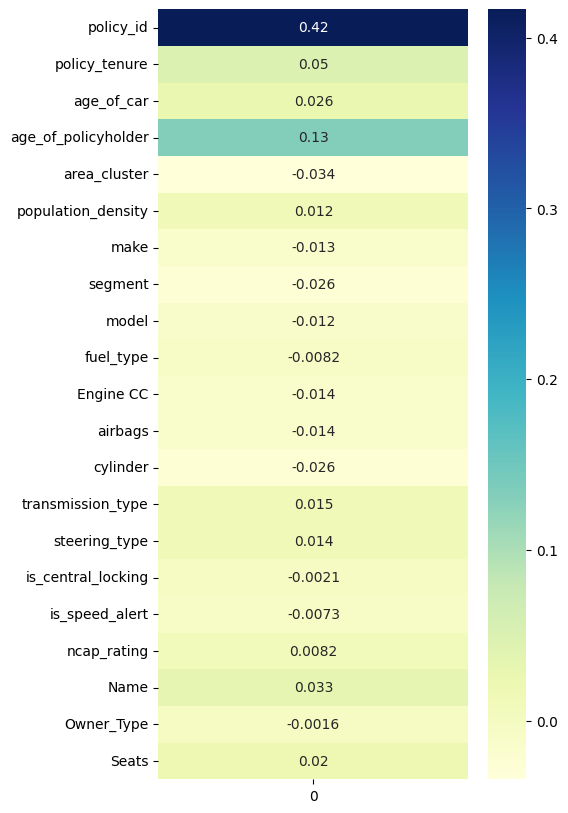

In [13]:
correlation =  train.drop('price',axis=1).corrwith(train['price'])
fig, ax = plt.subplots(figsize=(5,10))      
sns.heatmap(pd.DataFrame(correlation),annot = True,cmap="YlGnBu")
plt.show()

<Axes: xlabel='age_of_car'>

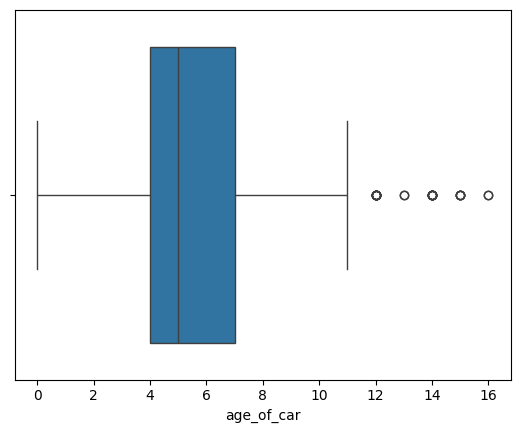

In [14]:
sns.boxplot(x='age_of_car', data=train)

In [15]:
train  = train[train.age_of_car <= train.age_of_car.quantile(0.995)]

In [16]:
train.shape

(997, 22)

<Axes: xlabel='age_of_car'>

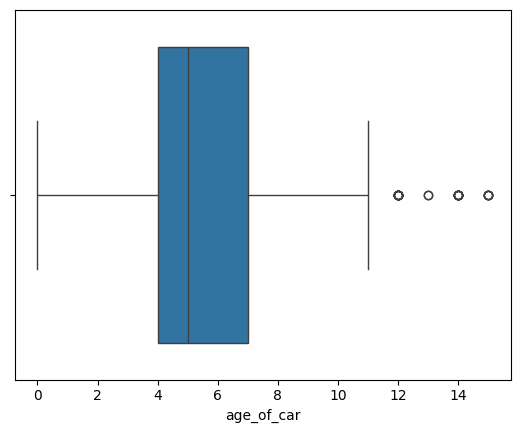

In [17]:
sns.boxplot(x='age_of_car', data=train)

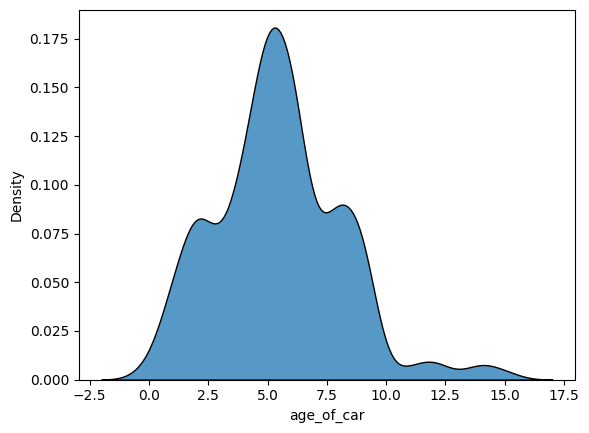

In [18]:
sns.kdeplot(data=train, x="age_of_car", multiple="stack")
plt.show()

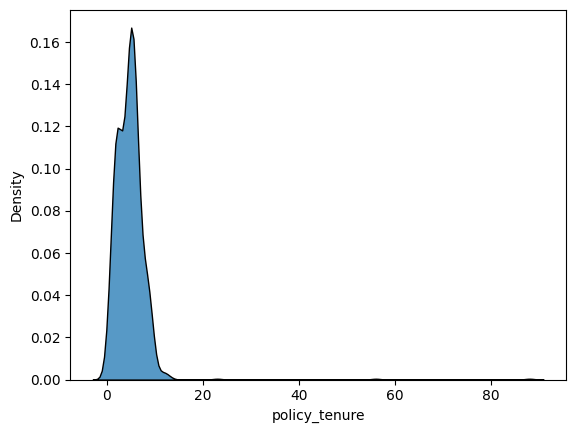

In [19]:
sns.kdeplot(data=train, x="policy_tenure", multiple="stack", common_norm=False)
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train[['policy_tenure','make','area_cluster','population_density','segment']] = scaler.fit_transform(train[['policy_tenure','make','area_cluster','population_density','segment']])

In [21]:
from sklearn.model_selection import train_test_split


X = train.drop('price', axis = 1)
Y = train['price']


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

## Treating data imbalance with SMOTE

In [22]:
Y_train.value_counts()

price
113    16
110    14
83     14
156    10
88     10
       ..
199     1
228     1
719     1
307     1
43      1
Name: count, Length: 562, dtype: int64

In [23]:
from scipy import stats
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer

z_scores = np.abs(stats.zscore(X_train))
threshold = 3
outliers = np.where(z_scores > threshold)
X_train_no_outliers = X_train[(z_scores < threshold).all(axis=1)]
Y_train_no_outliers = Y_train[(z_scores < threshold).all(axis=1)]
ros = RandomOverSampler(random_state=42)
X_train_resampled, Y_train_resampled = ros.fit_resample(X_train_no_outliers, Y_train_no_outliers)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_resampled)
X_train_final = pd.DataFrame(X_train_imputed, columns=X_train.columns)
#st.write("Class distribution after resampling:", Y_train_resampled.value_counts())





In [24]:
Y_train.value_counts()

price
113    16
110    14
83     14
156    10
88     10
       ..
199     1
228     1
719     1
307     1
43      1
Name: count, Length: 562, dtype: int64

### Linear Regression

MSE: 4.363836263699161
R²: 0.6203538827769928


<Figure size 1200x600 with 0 Axes>

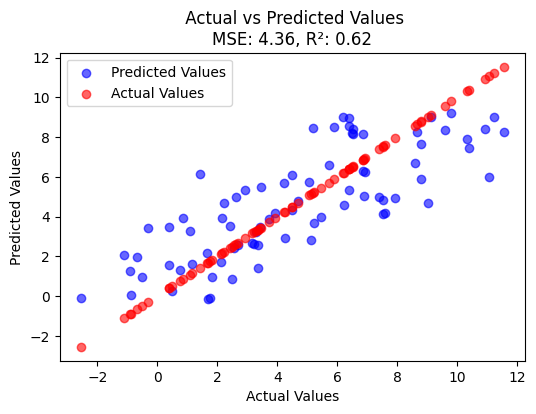

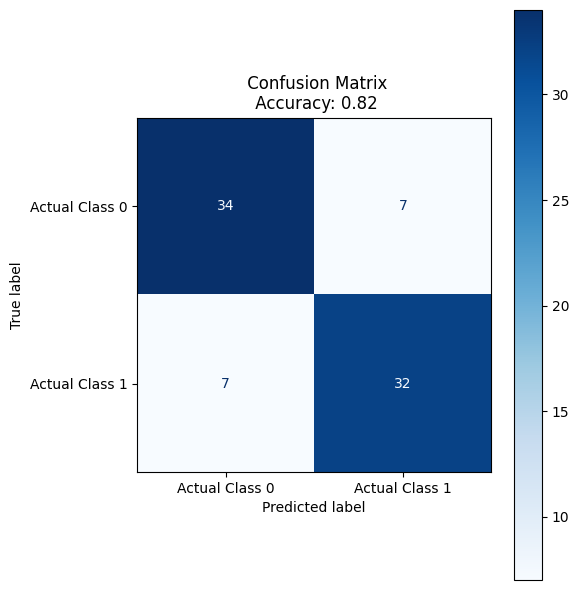

In [36]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, Y_train, X_test, and Y_test are already defined

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Make predictions on training data
lr_train_pred = lr_model.predict(X_train)

# Calculate training MSE and R²
lr_mse_train = mean_squared_error(Y_train, lr_train_pred)
lr_r2_train = r2_score(Y_train, lr_train_pred)
print("MSE:", lr_mse_train)
print("R²:", lr_r2_train)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot training data
plt.figure(figsize=(6, 4))
plt.scatter(Y_train, lr_train_pred, color='blue', label='Predicted Values', alpha=0.6)
plt.scatter(Y_train, Y_train, color='red', label='Actual Values', alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f' Actual vs Predicted Values\nMSE: {lr_mse_train:.2f}, R²: {lr_r2_train:.2f}')
plt.legend()
plt.show()

binarizer = Binarizer(threshold=np.mean(Y_train))
lr_train_pred_binary = binarizer.fit_transform(lr_train_pred.reshape(-1, 1)).ravel()




# Creating confusion matrix-like visualization for training data only
fig, ax = plt.subplots(figsize=(6, 6))

# Plot for training data
ConfusionMatrixDisplay(confusion_matrix(Y_train > np.mean(Y_train), lr_train_pred_binary), display_labels=['Actual Class 0', 'Actual Class 1']).plot(ax=ax, cmap='Blues')
ax.title.set_text(f' Confusion Matrix\n Accuracy: {lr_acc_train:.2f}')

plt.tight_layout()
plt.show()


Decision Tree MSE: 5.23
Random Forest MSE: 4.42


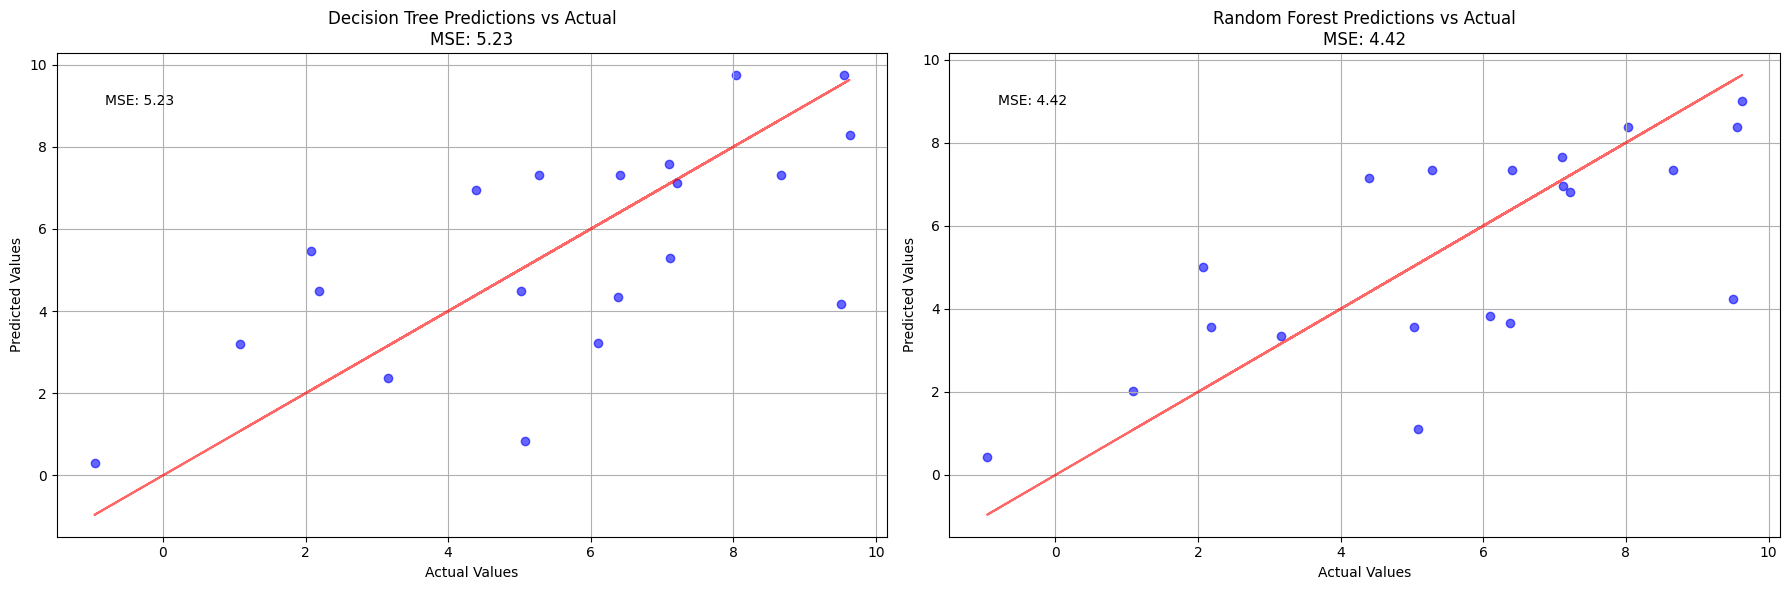

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Generate some sample data (replace with your actual data loading and preprocessing)
np.random.seed(0)
X = np.random.rand(100, 1) * 10
Y = (X + np.random.randn(100, 1) * 2).reshape(-1)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the models (use regressors instead of classifiers)
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()

# Fit the models
decision_tree_model.fit(X_train, Y_train)
random_forest_model.fit(X_train, Y_train)

# Make predictions
decision_tree_pred = decision_tree_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
decision_tree_mse = mean_squared_error(Y_test, decision_tree_pred)
random_forest_mse = mean_squared_error(Y_test, random_forest_pred)

# Print Mean Squared Errors
print(f"Decision Tree MSE: {decision_tree_mse:.2f}")
print(f"Random Forest MSE: {random_forest_mse:.2f}")

# Plotting scatter plot with indicators of prediction accuracy
plt.figure(figsize=(18, 6))

# Decision Tree predictions vs actual
plt.subplot(1, 2, 1)
plt.scatter(Y_test, decision_tree_pred, color='blue', alpha=0.6)
plt.plot(Y_test, Y_test, color='red', label='Actual Values', alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Decision Tree Predictions vs Actual\nMSE: {decision_tree_mse:.2f}')
plt.text(0.1, 0.9, f'MSE: {decision_tree_mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
plt.grid(True)

# Random Forest predictions vs actual
plt.subplot(1, 2, 2)
plt.scatter(Y_test, random_forest_pred, color='blue', alpha=0.6)
plt.plot(Y_test, Y_test, color='red', label='Actual Values', alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Random Forest Predictions vs Actual\nMSE: {random_forest_mse:.2f}')
plt.text(0.1, 0.9, f'MSE: {random_forest_mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
plt.grid(True)

plt.tight_layout()
plt.show()